In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from pydub import AudioSegment
from pydub.utils import make_chunks

import re

ValueError: x and y must have same first dimension, but have shapes (16000,) and (32,)

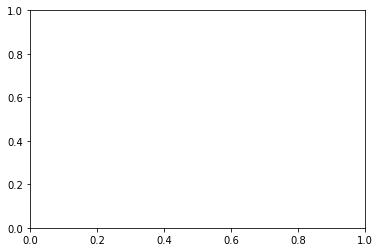

In [7]:
def get_features(data_dir, audio_files):
    momentos = {'ducha': 'Ducha', 'cena': 'Cena', 'washing': 'Lavadora', 'vacuum': 'Aspiradora', 
                'shaver': 'Afeitadora', 'hairdryer': 'Secador_pelo', 'airconditioner': 'Aire_acondicionado', 
                'cellphone': 'Telefono', 'comp': 'Tecleo', 'silence': 'Silencio', 'dryer': 'Secadora', 
                'blender': 'Licuadora', 'doorbell': 'Timbre', 'alarm': 'Alarma', 'faucet': 'Grifo', 
                'microwave': 'Microondas'}
    features = []
    for i in range(1):
        y, sr = librosa.load(audio_files[i], sr=8000, mono=True)
        sp = np.fft.fft(y, n=32)
        freq = np.fft.fftfreq(y.shape[-1])
        plt.plot(freq, sp.real, freq, sp.imag)
        plt.show()
        name = os.listdir(data_dir)[i]
        pattern = "[._][\w]+"
        name2 = re.sub(pattern, '', name)
        if name2 in momentos.keys():
            momento = momentos.get(name2)
        else:
            momento = 'Otro'
        mfcc = np.ndarray.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20))
        scem = np.ndarray.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        scom = np.ndarray.mean(librosa.feature.spectral_contrast(S=np.abs(librosa.stft(y)), sr=sr, n_bands=4))
        srom = np.ndarray.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        sbwm = np.ndarray.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr, hop_length=512), sr=sr, hop_length=512)[0]
        rmse = np.ndarray.mean(librosa.feature.rms(y=y))
        D = np.abs(np.fft.fft(y, n=32)[:8000*2 // 2])
        features.append([name, mfcc, scem, scom, srom, sbwm, tempo, rmse, 
                         D[0], D[1], D[2], D[3], D[4], D[5], 
                         D[6], D[7], D[8], D[9], D[10], D[11], 
                         D[12], D[13], D[14], D[15], D[16], D[17], 
                         D[18], D[19], D[20], D[21], D[22], D[23],
                         D[24], D[25], D[26], D[27], D[28], D[29],
                         D[30], D[31], momento])
    return pd.DataFrame(features, columns=['name', 'mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
                                           'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
                                           'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
                                           'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
                                           'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
                                           'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
                                           'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
                                           'Fourier31', 'Fourier32', 'momento'])

data2 = get_features('./sounds2/', glob('./sounds2' + '/*.wav'))

In [4]:
data2

,name,mfcc,scem,scom,srom,sbwm,tempo,rmse,Fourier1,Fourier2,...,Fourier24,Fourier25,Fourier26,Fourier27,Fourier28,Fourier29,Fourier30,Fourier31,Fourier32,momento
0,doorbell_3.mp3210.wav,-19.60294,1016.689071,28.116497,1344.604492,526.793735,117.1875,0.082146,0.009263,0.012996,...,0.006196,0.007697,0.008855,0.012467,0.022492,0.063204,0.154885,0.012584,0.012996,Timbre


In [5]:
import matplotlib.pyplot as plt
sp = np.fft.fft(y, n=32)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

NameError: name 'y' is not defined

In [16]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np


In [27]:
rate, data = wav.read('ducha.wav')
fft_out = np.fft.fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

ValueError: x and y must have same first dimension, but have shapes (2741000,) and (8000,)

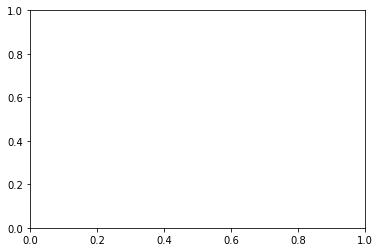

In [26]:
y, sr = librosa.load('ducha.wav', sr=8000, mono=True)
D = np.abs(np.fft.fft(y)[:8000*2 // 2])
%matplotlib inline
plt.plot(y, D)
plt.show()

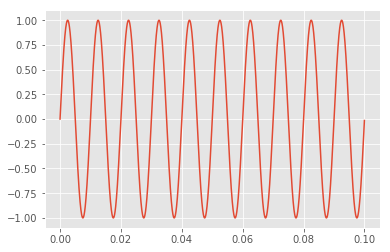

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()

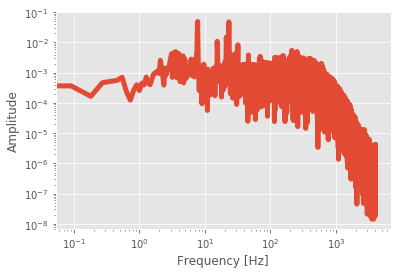

In [30]:
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 11 # seconds of sampling
N = Fs*t # total points in signal

y, sr = librosa.load('airconditioner.wav', sr=Fs, mono=True)

Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [34]:
y, sr = librosa.load('ducha.wav', sr=8000, mono=True)
D = np.abs(librosa.stft(y))
print(len(D))
D

1025


array([[3.7328682e-03, 4.4175508e-03, 5.0727176e-03, ..., 5.1658186e-03,
        4.7208620e-03, 4.1835299e-03],
       [1.1301858e-03, 2.7053971e-03, 2.4684875e-03, ..., 2.6721850e-03,
        2.3591204e-03, 2.0329708e-03],
       [1.3361638e-03, 7.8440004e-04, 2.6645814e-04, ..., 1.3698677e-04,
        2.1163646e-04, 5.4504268e-04],
       ...,
       [2.6563328e-04, 5.6232401e-04, 1.1677895e-03, ..., 7.6093205e-04,
        4.5350564e-04, 3.6925034e-05],
       [5.6324026e-04, 3.8109726e-04, 1.3401881e-03, ..., 7.2903722e-04,
        4.8162154e-04, 1.4759919e-04],
       [6.4857985e-04, 3.3374177e-04, 1.2567918e-03, ..., 6.6774507e-04,
        2.9876697e-04, 2.2854000e-04]], dtype=float32)

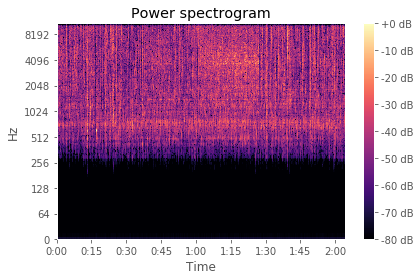

In [37]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

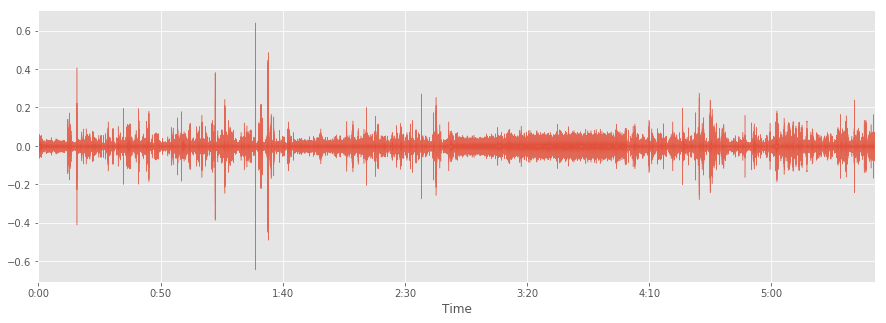

In [40]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr, alpha=0.8)

In [ ]:
T = 11.0 # seconds
f0 = 1047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

Text(0.5, 0, 'Frequency (Hz)')

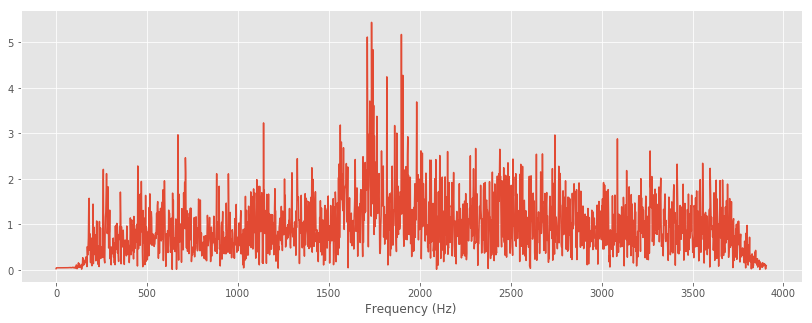

In [44]:
import scipy

X = scipy.fft(y[:4096])
X_mag = np.absolute(X)        # spectral magnitude
f = np.linspace(0, sr, 4096)  # frequency variable
plt.figure(figsize=(14, 5))
plt.plot(f[:2000], X_mag[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')